In [316]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [317]:
credits = pd.read_csv("/content/drive/MyDrive/TMDB_5000/tmdb_5000_credits.csv")
movies = pd.read_csv("/content/drive/MyDrive/TMDB_5000/tmdb_5000_movies.csv")

credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [318]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [319]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [320]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [321]:
print(credits.shape)
print(movies.shape)

(4803, 4)
(4803, 20)


In [322]:
movies = movies.merge(credits, on='title')

In [323]:
movies.shape

(4809, 23)

In [324]:
movies = movies[['movie_id','title','genres','cast','overview','keywords','crew']]

In [325]:
movies.head(5)

,movie_id,title,genres,cast,overview,keywords,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [326]:
movies.isnull().sum()

,0
movie_id,0
title,0
genres,0
cast,0
overview,3
keywords,0
crew,0


In [327]:
movies.dropna(inplace=True)

In [328]:
movies.isnull().sum()

,0
movie_id,0
title,0
genres,0
cast,0
overview,0
keywords,0
crew,0


In [329]:
movies.duplicated().sum()

np.int64(0)

In [330]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [331]:
import json

s = '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
parsed = json.loads(s)
print(parsed)

[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]


In [332]:
import pandas as pd
import json

# JSON 문자열에서 name 값만 추출 (공통 함수)
def extract_names(obj, limit=None, job=None):
    try:
        data = json.loads(obj)
        if job:  # 특정 직업 필터링 (예: 감독만)
            return [i['name'] for i in data if i.get('job') == job][:1]
        if limit:  # 상위 몇 개만 추출 (예: 상위 3명 배우)
            return [i['name'] for i in data[:limit]]
        return [i['name'] for i in data]  # 일반 리스트 추출
    except (json.JSONDecodeError, TypeError):
        return []

In [333]:
movies['genres'] = movies['genres'].apply(extract_names)
movies['keywords'] = movies['keywords'].apply(extract_names)
movies['cast'] = movies['cast'].apply(lambda x: extract_names(x, limit=3))       # 상위 3명 배우
movies['crew'] = movies['crew'].apply(lambda x: extract_names(x, job='Director')) # 감독 1명

In [334]:
movies.head()

,movie_id,title,genres,cast,overview,keywords,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...",[Andrew Stanton]


- 장르 분포 시각화

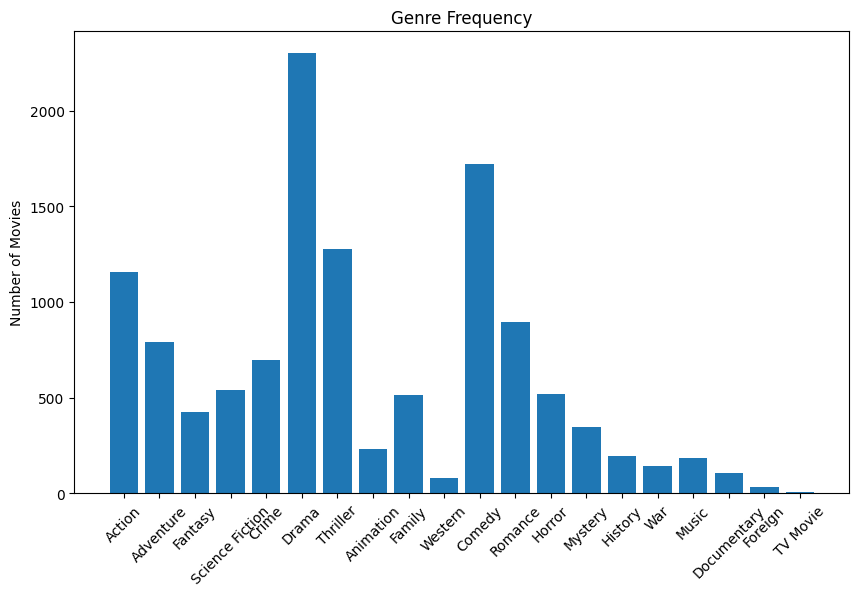

In [335]:
import matplotlib.pyplot as plt
from collections import Counter

genre_list = movies['genres'].explode()
genre_counts = Counter(genre for sublist in movies['genres'] for genre in sublist)

plt.figure(figsize=(10,6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.title('Genre Frequency')
plt.xticks(rotation=45)
plt.ylabel("Number of Movies")
plt.show()


- 배우 출연 시각화

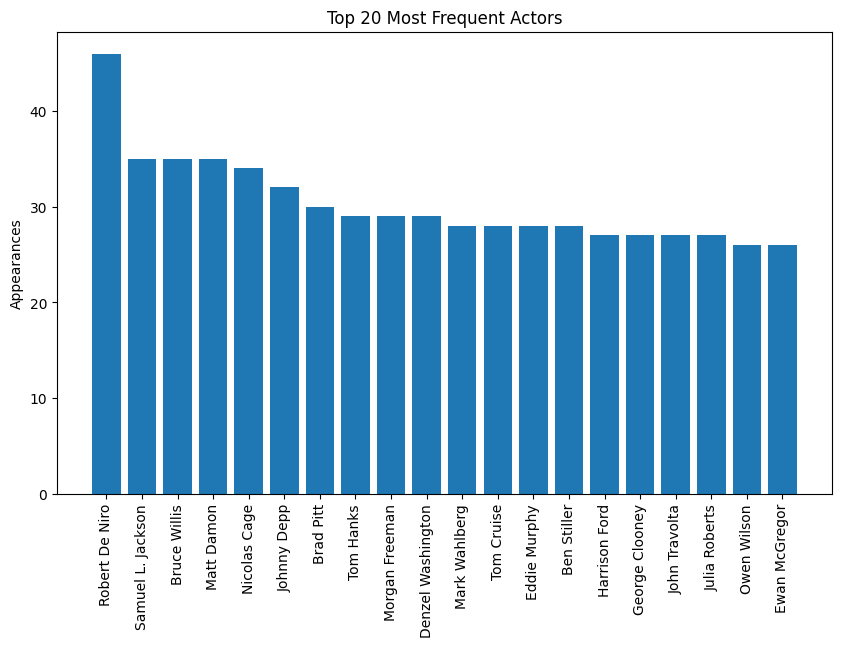

In [336]:
from collections import Counter
import matplotlib.pyplot as plt

# 리스트 컴프리헨션으로 flatten
all_actors = [actor for cast_list in movies['cast'] for actor in cast_list]

# 등장 횟수 세기
actor_counts = Counter(all_actors)
top_actors = dict(actor_counts.most_common(20))

# 시각화
plt.figure(figsize=(10,6))
plt.bar(top_actors.keys(), top_actors.values())
plt.title("Top 20 Most Frequent Actors")
plt.xticks(rotation=90)
plt.ylabel("Appearances")
plt.show()

- 감독별 영화 수

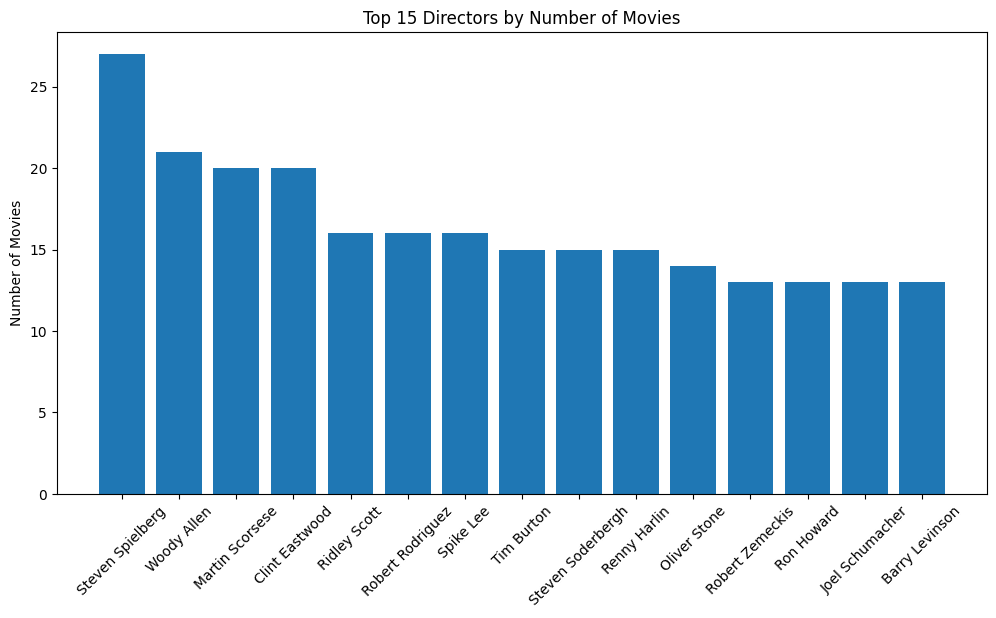

In [337]:
from collections import Counter

director_list = movies['crew'].explode()  # 감독만 추출된 리스트
director_count = Counter(director_list)
top_directors = dict(director_count.most_common(15))

plt.figure(figsize=(12,6))
plt.bar(top_directors.keys(), top_directors.values())
plt.xticks(rotation=45)
plt.title("Top 15 Directors by Number of Movies")
plt.ylabel("Number of Movies")
plt.show()


- 배우 등장 횟수

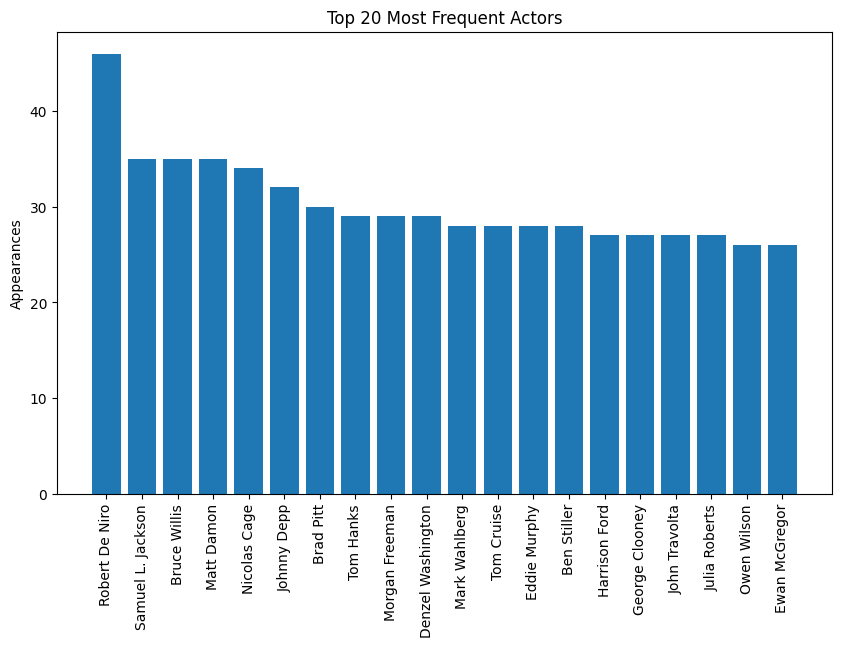

In [338]:
from collections import Counter
import matplotlib.pyplot as plt

# 리스트 컴프리헨션으로 flatten
all_actors = [actor for cast_list in movies['cast'] for actor in cast_list]

# 등장 횟수 세기
actor_counts = Counter(all_actors)
top_actors = dict(actor_counts.most_common(20))

# 시각화
plt.figure(figsize=(10,6))
plt.bar(top_actors.keys(), top_actors.values())
plt.title("Top 20 Most Frequent Actors")
plt.xticks(rotation=90)
plt.ylabel("Appearances")
plt.show()

- 텍스트 분석
    - overview  길이 분포 확인

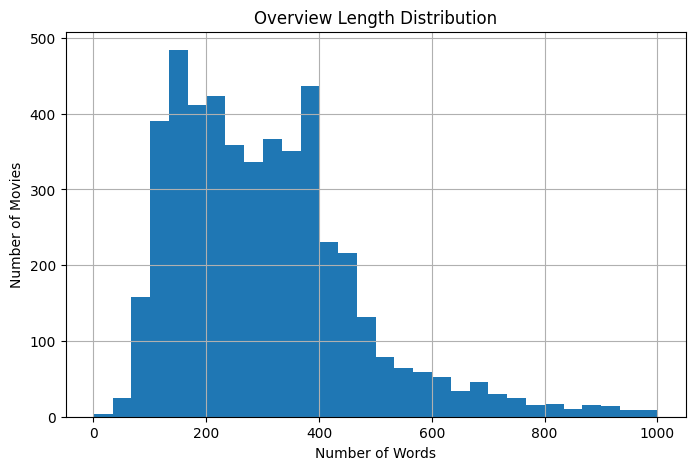

In [339]:
movies['overview_len'] = movies['overview'].apply(lambda x: len(x))
movies['overview_len'].hist(bins=30, figsize=(8,5))
plt.title("Overview Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Movies")
plt.show()

- WordCloud로 주요 단어 시각화

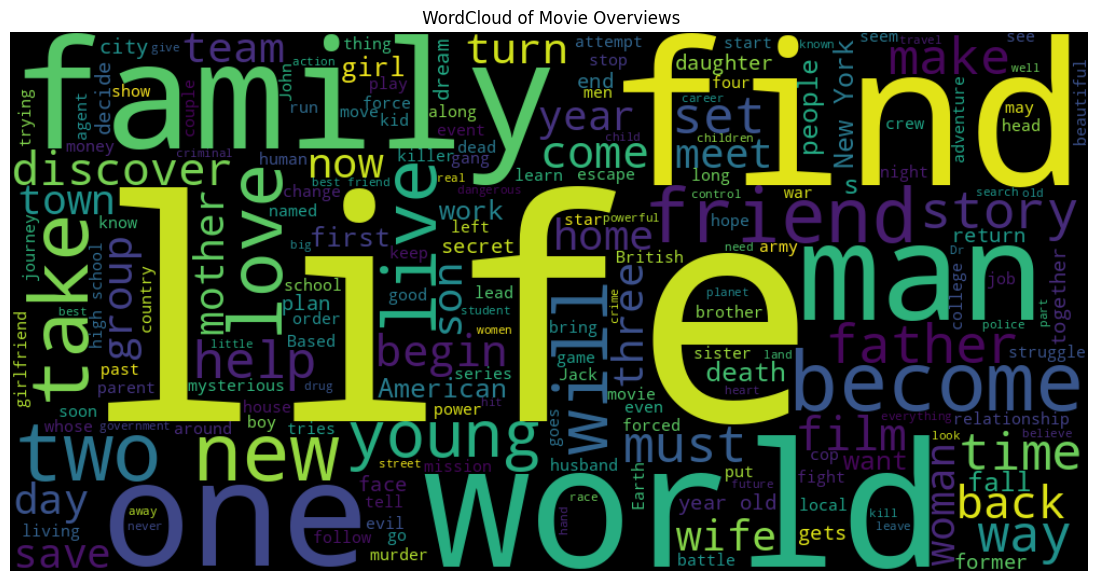

In [340]:
from wordcloud import WordCloud

text = " ".join(movies['overview'])
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(" WordCloud of Movie Overviews")
plt.show()

- 단어 기반 overview wordcloud(감성 키워드 중심 분석)

In [341]:
movies1 = pd.read_csv("/content/drive/MyDrive/TMDB_5000/tmdb_5000_movies.csv")

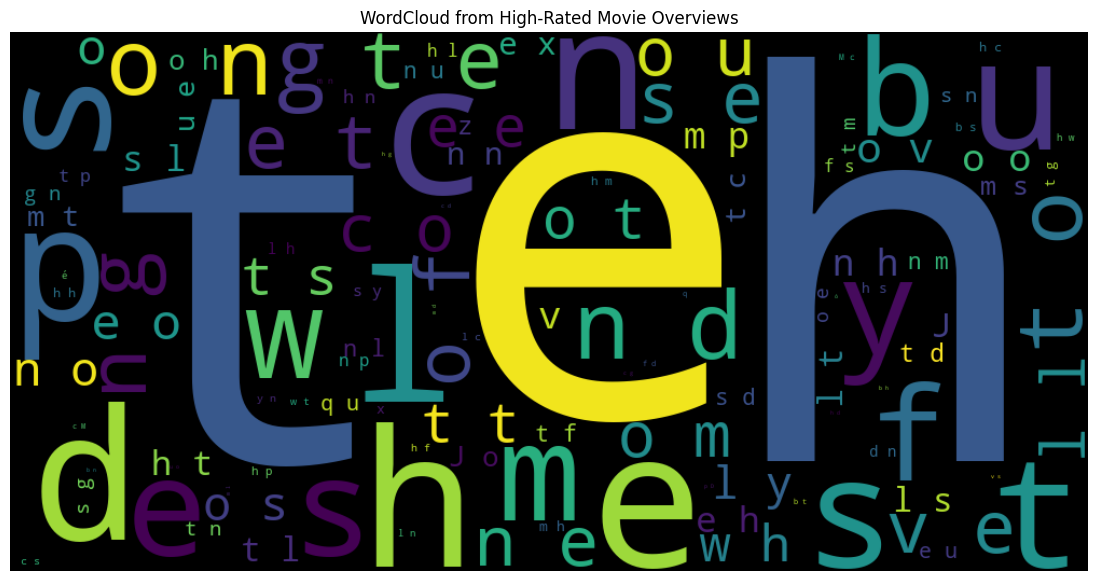

In [342]:
from wordcloud import WordCloud

# 평점이 높은 영화들의 overview만 사용 (예: 8.0 이상)
high_rated = movies1[movies1['vote_average'] >= 8.0]
text_high = " ".join([" ".join(i) for i in high_rated['overview']])

wordcloud_high = WordCloud(width=1000, height=500, background_color='black').generate(text_high)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from High-Rated Movie Overviews")
plt.show()

- 평점 분포 히스토그램

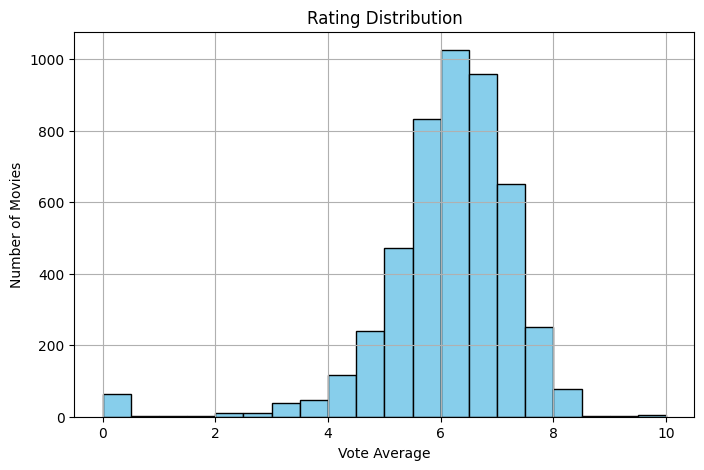

In [343]:
plt.figure(figsize=(8,5))
plt.hist(movies1['vote_average'], bins=20, color='skyblue', edgecolor='black')
plt.title("Rating Distribution")
plt.xlabel("Vote Average")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [344]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x).lower())

In [345]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(movies['tags']).toarray()
similarity = cosine_similarity(vectors)

In [346]:
def recommend(title):
    idx = movies[movies['title'] == title].index[0]
    distances = list(enumerate(similarity[idx]))
    movies_list = sorted(distances, key=lambda x: x[1], reverse=True)[1:6]

    print(f" 추천 영화 for '{title}':")
    for i in movies_list:
        print(movies.iloc[i[0]].title)

In [347]:
recommend('Avatar')

 추천 영화 for 'Avatar':
Aliens
Moonraker
Alien
Alien³
Silent Running


In [348]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [349]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(tags_df['tags'])  # shape: (n_movies, 5000)

In [350]:
svd = TruncatedSVD(n_components=100, random_state=42)
svd_matrix = svd.fit_transform(tfidf_matrix)  # shape: (n_movies, 100)

In [351]:
similarity = cosine_similarity(svd_matrix)

In [352]:
def recommend_svd(title, top_n=5):
    if title not in tags_df['title'].values:
        print("제목을 찾을 수 없습니다.")
        return

    idx = tags_df[tags_df['title'] == title].index[0]
    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    print(f"'{title}'와 비슷한 영화 추천:")
    for i in sim_scores:
        print(f"- {tags_df.iloc[i[0]]['title']} (유사도: {i[1]:.2f})")


In [353]:
recommend_svd("Avatar")

'Avatar'와 비슷한 영화 추천:
- Independence Day (유사도: 0.69)
- Titan A.E. (유사도: 0.69)
- Mission to Mars (유사도: 0.68)
- Predators (유사도: 0.67)
- The Host (유사도: 0.67)


- 차원 축소시 exaplained variance

In [354]:
explained = svd.explained_variance_ratio_.sum()
print(f"SVD로 설명되는 분산 비율: {explained:.2%}")

SVD로 설명되는 분산 비율: 13.84%


- PCA 기반 영화 클러스터링 시각화

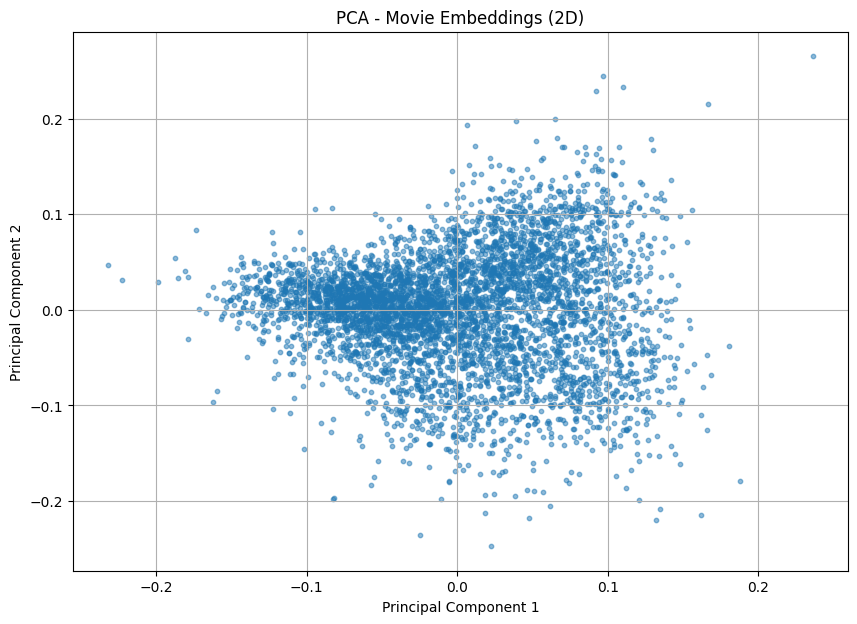

In [355]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2D PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(svd_matrix)

plt.figure(figsize=(10,7))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5, s=10)
plt.title("PCA - Movie Embeddings (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


- t-sne 기반 영화 클러스터링 시각화|

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



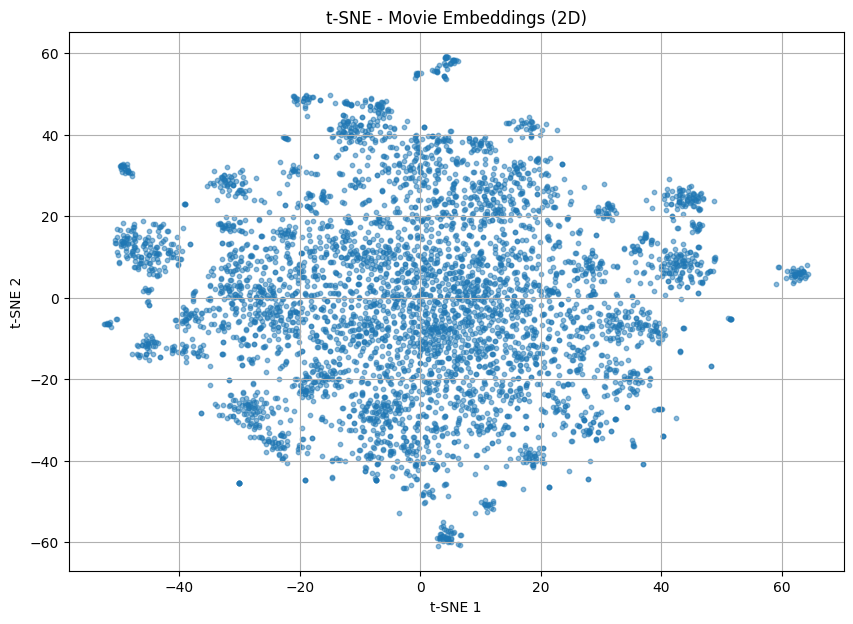

In [356]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(svd_matrix)

plt.figure(figsize=(10,7))
plt.scatter(tsne_result[:,0], tsne_result[:,1], alpha=0.5, s=10)
plt.title("t-SNE - Movie Embeddings (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()


- 선택된 영화 제목 표시

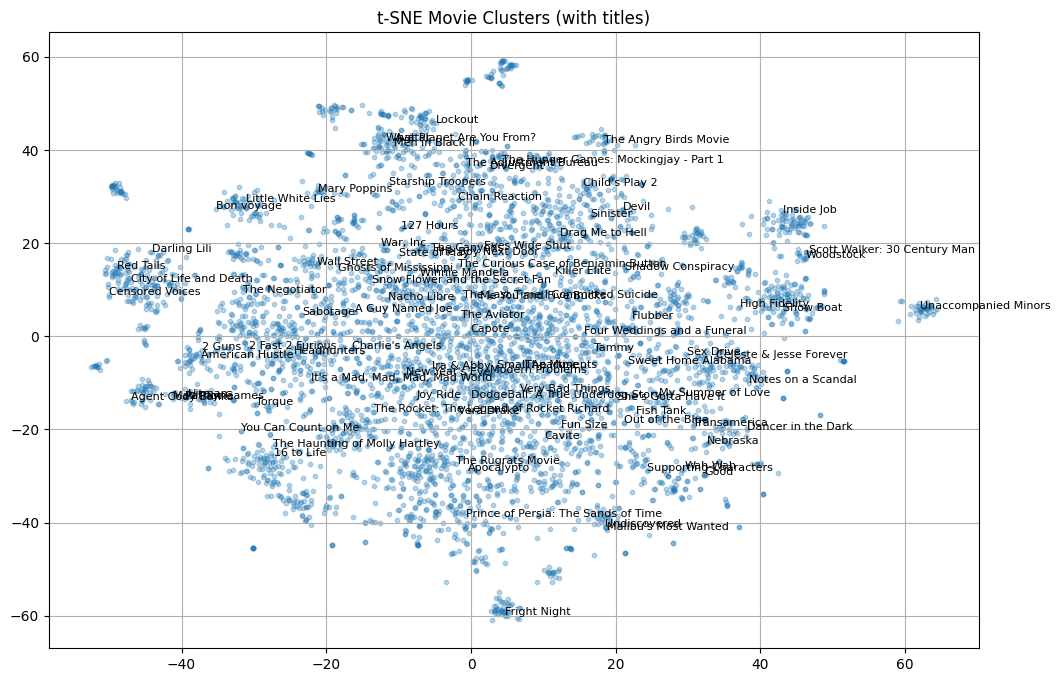

In [357]:
plt.figure(figsize=(12,8))
for i in range(0, len(tsne_result), 50):  # 일부만 표시
    plt.text(tsne_result[i,0], tsne_result[i,1], tags_df.iloc[i]['title'], fontsize=8)
plt.scatter(tsne_result[:,0], tsne_result[:,1], alpha=0.3, s=10)
plt.title("t-SNE Movie Clusters (with titles)")
plt.grid(True)
plt.show()

- 클러스터링 알고리즘(kmeans) 적용 후 시각화

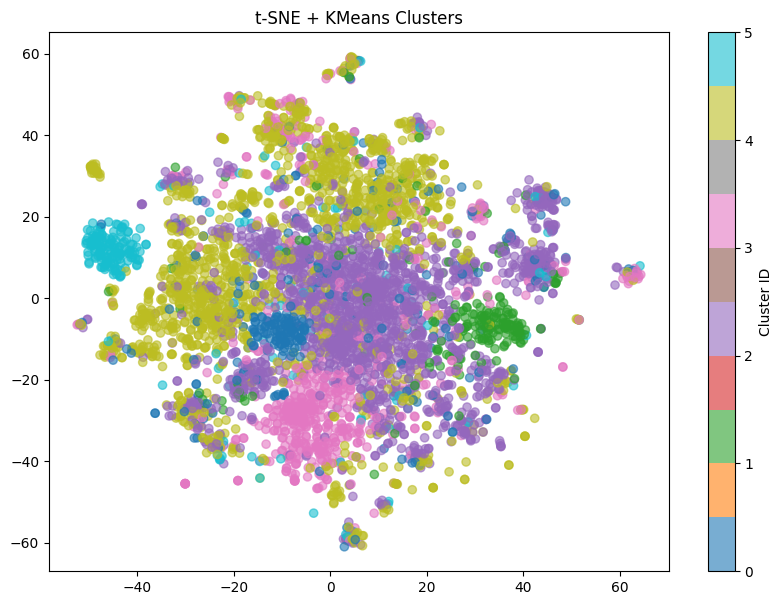

In [358]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(svd_matrix)

plt.figure(figsize=(10,7))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=cluster_labels, cmap='tab10', alpha=0.6)
plt.title("t-SNE + KMeans Clusters")
plt.colorbar(label="Cluster ID")
plt.show()


In [359]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# t-SNE로 2차원 임베딩
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(svd_matrix)

# KMeans 클러스터링 (선택사항)
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(svd_matrix)

# 결과 DataFrame 생성
tsne_df = pd.DataFrame({
    'x': tsne_result[:,0],
    'y': tsne_result[:,1],
    'title': tags_df['title'],
    'cluster': cluster_labels
})

# Plotly 시각화
fig = px.scatter(
    tsne_df,
    x='x',
    y='y',
    color=tsne_df['cluster'].astype(str),
    hover_data=['title'],
    title='Interactive t-SNE Movie Clusters (with KMeans)',
    labels={'cluster': 'Cluster ID'},
    width=1000,
    height=600
)

fig.update_layout(showlegend=True)
fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



- 장르 기반 주제 분석

In [360]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf.fit_transform(tags_df['tags'])

nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf_matrix)

# 토픽 키워드 출력
for topic_idx, topic in enumerate(nmf.components_):
    top_keywords = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f" Topic #{topic_idx}: {' | '.join(top_keywords)}")


 Topic #0: sex | new | young | woman | man | life | drama | comedy | love | romance
 Topic #1: revenge | drama | drug | fbi | agent | murder | police | action | thriller | crime
 Topic #2: christmas | evil | save | duringcreditsstinger | world | comedy | fantasy | adventure | animation | family
 Topic #3: american | soldier | story | worldwarii | ii | drama | army | world | history | war
 Topic #4: young | blood | zombie | murder | group | vampire | killer | mystery | thriller | horror
 Topic #5: crew | future | space | dystopia | planet | adventure | earth | alien | action | sciencefiction
 Topic #6: filmmaker | director | michaelmoore | world | womandirector | american | movie | look | film | documentary
 Topic #7: best | teenager | students | college | teacher | comedy | highschool | friends | high | school
 Topic #8: family | town | daughter | life | son | year | mother | drama | old | father
 Topic #9: hop | drama | hip | new | rock | dance | singer | band | musical | music


- 장르 분포의 클러스티렁 및 특징 추출
    - 어떤 장르가 유사한 영화들을 공유하는지

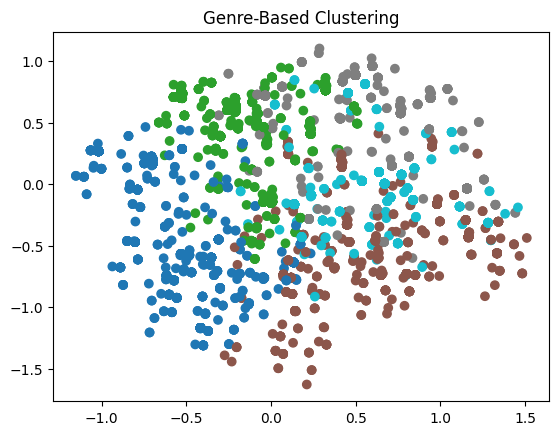

In [361]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies['genres'])

kmeans = KMeans(n_clusters=5, random_state=42)
genre_clusters = kmeans.fit_predict(genre_matrix)

pca = PCA(n_components=2)
reduced = pca.fit_transform(genre_matrix)

plt.scatter(reduced[:,0], reduced[:,1], c=genre_clusters, cmap='tab10')
plt.title("Genre-Based Clustering")
plt.show()

### 배우 협업 네트워크 분석 with NetworkX

- 목적

    - 영화 출연진(cast) 데이터를 기반으로 배우 간 협업 네트워크를 구성하고,

    - 누가 가장 많이 협업했는지 파악하며,

    - 네트워크 시각화를 통해 중심 배우와 강한 연결을 탐색합니다.



In [362]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

- 기본 네트워크 구성

In [363]:
G = nx.Graph()

for cast_list in movies['cast']:
    if len(cast_list) < 2:
        continue  # 1인 캐스팅은 제외

    for i in range(len(cast_list)):
        for j in range(i+1, len(cast_list)):
            a, b = cast_list[i], cast_list[j]

            if G.has_edge(a, b):
                G[a][b]['weight'] += 1
            else:
                G.add_edge(a, b, weight=1)

- 중요 배우 중심 플터링
    - 협업 횟수가 많은 배우들만 추려내어 시각화를 깔끔하게 듦.

In [364]:
# 각 배우의 협업 횟수 누적
actor_counts = Counter()

for u, v, d in G.edges(data=True):
    actor_counts[u] += d['weight']
    actor_counts[v] += d['weight']

# 상위 N명 배우만 추출
top_n = 30
top_actors = [actor for actor, _ in actor_counts.most_common(top_n)]

# 하위 노드 제거된 서브그래프 생성
subG = G.subgraph(top_actors)

- 시각화
    - 협업 강동에 따른 네트워크 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython

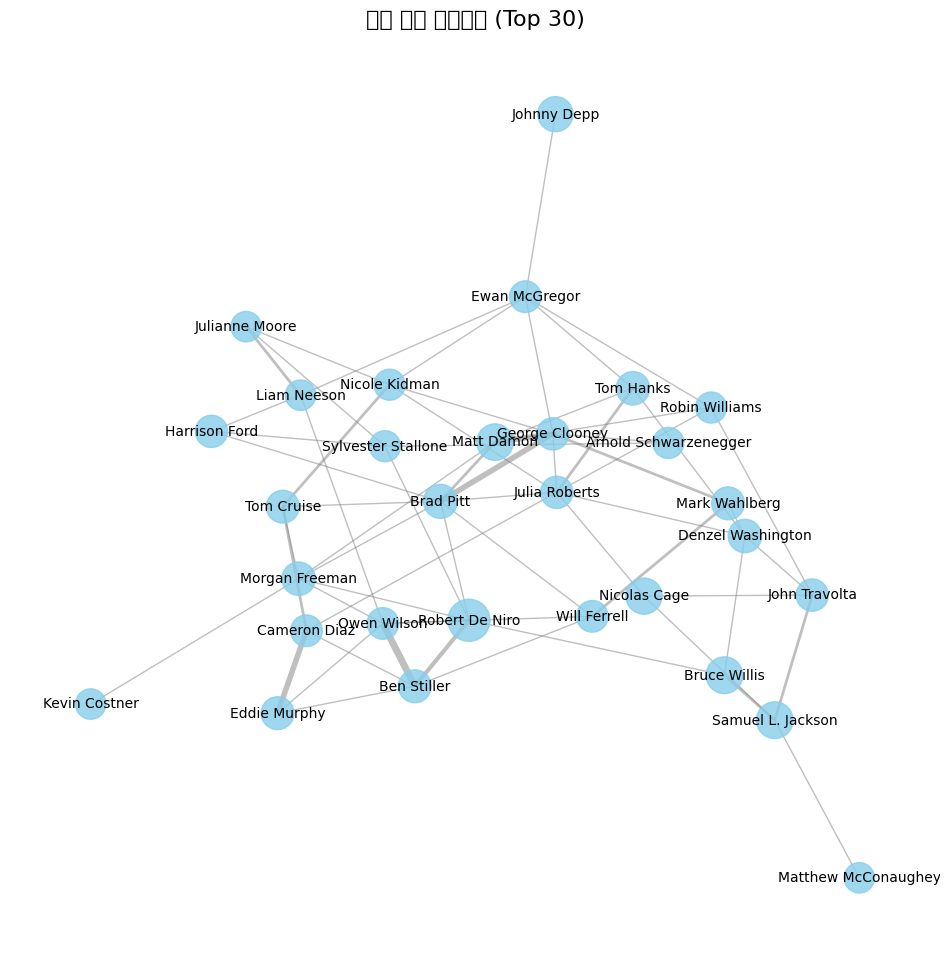

In [365]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subG, k=0.5, iterations=50, seed=42)

# 노드 크기: 협업 횟수에 비례
node_sizes = [actor_counts[node]*10 for node in subG.nodes()]

# 엣지 두께: 협업 강도(weight)에 비례
edge_widths = [subG[u][v]['weight'] for u, v in subG.edges()]

nx.draw_networkx_nodes(subG, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(subG, pos, width=edge_widths, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(subG, pos, font_size=10, font_family='sans-serif')

plt.title("배우 협업 네트워크 (Top 30)", fontsize=16)
plt.axis('off')
plt.show()

#### 정리

 - networkx는 관계형 데이터 분석에 매우 적합하며,

 - 영화 출연진 데이터를 통해 배우 간 관계를 시각적으로 해석할 수 있습니다.

 - 가장 연결이 많은 노드 = 협업을 많이 한 배우

 - 엣지 두께 = 함께 출연한 영화 수